In [23]:
import pandas as pd
import numpy as np
import scipy
import os
import os.path
from matplotlib import cm
from IPython.display import display, HTML

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import calendar

df = pd.read_csv("Data/ava.csv")

In [24]:
df = df.drop(["Unnamed: 0"], axis = 1)
df.head()
print(sorted(df.cycle_length.unique()))
df[df.cycle_length == 300]

[11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 47, 48, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 73, 92, 98, 107, 112, 123, 124, 167, 228, 245, 300]


,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br
6659,924,2016-01-16,2016-11-10,1,300,2016-10-19,278,34.940000,57.398762,14.685458
6660,924,2016-01-16,2016-11-10,1,300,2016-10-20,279,35.190000,60.063123,14.843716
6661,924,2016-01-16,2016-11-10,1,300,2016-10-21,280,34.500000,58.511860,14.268167
6662,924,2016-01-16,2016-11-10,1,300,2016-10-22,281,34.480000,59.146003,14.875080
6663,924,2016-01-16,2016-11-10,1,300,2016-10-23,282,35.160000,59.230558,14.378818
6664,924,2016-01-16,2016-11-10,1,300,2016-10-24,283,35.027100,59.066082,14.933756
6665,924,2016-01-16,2016-11-10,1,300,2016-10-25,284,34.626435,61.210112,14.957227
6666,924,2016-01-16,2016-11-10,1,300,2016-10-26,285,34.787641,64.162288,14.576343
6667,924,2016-01-16,2016-11-10,1,300,2016-10-27,286,34.761692,62.205559,14.415392
6668,924,2016-01-16,2016-11-10,1,300,2016-10-28,287,35.040889,60.012912,14.120220


In [3]:
#Create a new function:
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
#print("\nMissing values per row:")
#print(df.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
user                 0
first_date           0
last_date            0
cycle_number         0
cycle_length         0
date                 0
cycle_day            0
skin_temperature    16
hr                  16
br                   9
dtype: int64


### work only without NaNs

In [25]:
df = df.dropna(axis = 0)
df[df.cycle_length == 300]

,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br
6659,924,2016-01-16,2016-11-10,1,300,2016-10-19,278,34.940000,57.398762,14.685458
6660,924,2016-01-16,2016-11-10,1,300,2016-10-20,279,35.190000,60.063123,14.843716
6661,924,2016-01-16,2016-11-10,1,300,2016-10-21,280,34.500000,58.511860,14.268167
6662,924,2016-01-16,2016-11-10,1,300,2016-10-22,281,34.480000,59.146003,14.875080
6663,924,2016-01-16,2016-11-10,1,300,2016-10-23,282,35.160000,59.230558,14.378818
6664,924,2016-01-16,2016-11-10,1,300,2016-10-24,283,35.027100,59.066082,14.933756
6665,924,2016-01-16,2016-11-10,1,300,2016-10-25,284,34.626435,61.210112,14.957227
6666,924,2016-01-16,2016-11-10,1,300,2016-10-26,285,34.787641,64.162288,14.576343
6667,924,2016-01-16,2016-11-10,1,300,2016-10-27,286,34.761692,62.205559,14.415392
6668,924,2016-01-16,2016-11-10,1,300,2016-10-28,287,35.040889,60.012912,14.120220


In [5]:
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
user                0
first_date          0
last_date           0
cycle_number        0
cycle_length        0
date                0
cycle_day           0
skin_temperature    0
hr                  0
br                  0
dtype: int64


In [6]:
print("number of users: ", len(df["user"].unique()))
print("number of cycles: ", len(df.groupby(["user","cycle_number"]).describe()))

number of users:  180
number of cycles:  792


data.loc[(data["Gender"]=="Female") & (data["Education"]=="Not Graduate") & (data["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]

### normalisation / standardisation of features / create new cycle index independent from user and cycle number

In [7]:
#### cycle index for all women
df2 = df.reset_index()
#create a new column for indexing all cycles
df2["cycle_index"] = df2.index

#normalize features hr, br, and skin_temperature
#create new columns for normalized values


cycle_index = []
br_norm = []
hr_norm = []
st_norm = []

br_stan = []
hr_stan = []
st_stan = []

#cycle_index number
i = 0
for user in df2.user.unique():
    for cycle in df2[df2.user == user]["cycle_number"].unique():
        #print("user: ", user)
        #print("cycle: ", cycle)
        #print(i)
        
        # j... length of cycle
        for j in range(len(df2[(df2.user == user)&(df2.cycle_number == cycle)])):
            #print("j:",j)
            cycle_index.append(i)
            #print(cycle_index)
        i+=1        

        df_temp = df2[(df2.user == user)&(df2.cycle_number == cycle)][["skin_temperature", "hr", "br"]]
        #print(df_temp)
        st_norm_temp = (df_temp["skin_temperature"]-df_temp["skin_temperature"].mean())\
                                       /df_temp["skin_temperature"].std()
        hr_norm_temp = (df_temp["hr"]-df_temp["hr"].mean()) /df_temp["hr"].std()
        br_norm_temp = (df_temp["br"]-df_temp["br"].mean())/df_temp["br"].std()
        
        st_stan_temp = (df_temp["skin_temperature"]-df_temp["skin_temperature"].min()) \
        /(df_temp["skin_temperature"].max()-df_temp["skin_temperature"].min())
        hr_stan_temp = (df_temp["hr"]-df_temp["hr"].min()) /(df_temp["hr"].max()-df_temp["hr"].min())
        br_stan_temp = (df_temp["br"]-df_temp["br"].min()) /(df_temp["br"].max()-df_temp["br"].min())
        
        ## append normalized values to list
        st_norm.extend(st_norm_temp.values.tolist())
        br_norm.extend(br_norm_temp.values.tolist())
        hr_norm.extend(hr_norm_temp.values.tolist())
        
        st_stan.extend(st_stan_temp.values.tolist())
        br_stan.extend(br_stan_temp.values.tolist())
        hr_stan.extend(hr_stan_temp.values.tolist())

        
#fill columns with list values
df2["cycle_index"] = cycle_index
df2["br_norm"] = br_norm
df2["hr_norm"] = hr_norm
df2["st_norm"] = st_norm

df2["br_stan"] = br_stan
df2["hr_stan"] = hr_stan
df2["st_stan"] = st_stan

#print(df2[df2.cycle_index ==110])

In [8]:
df2.cycle_index.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [9]:
print("Missing values per column:")
print(df2.apply(num_missing, axis=0))
print("5 cycles with only one time value - scaling not possible")

Missing values per column:
index               0
user                0
first_date          0
last_date           0
cycle_number        0
cycle_length        0
date                0
cycle_day           0
skin_temperature    0
hr                  0
br                  0
cycle_index         0
br_norm             5
hr_norm             5
st_norm             5
br_stan             5
hr_stan             5
st_stan             5
dtype: int64
5 cycles with only one time value - scaling not possible


In [10]:
#df2[df2["br_norm"].isnull()]

## Cycle length

unique cycle lengths:  [11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 47, 48, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 73, 92, 98, 107, 112, 123, 124, 167, 228, 245, 300]
number of unique cycle lengths:  59

regular cycle lengths between 20 and 36 days

[3, 1, 2, 2, 1, 1, 1, 1, 7, 7, 22, 41, 56, 77, 91, 133, 72, 71, 51, 33, 25, 16, 11, 4, 3, 2, 6, 4, 4, 3, 1, 1, 1, 1, 2, 2, 3, 1, 2, 4, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

[11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 47, 48, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 73, 92, 98, 107, 112, 123, 124, 167, 228, 245, 300]


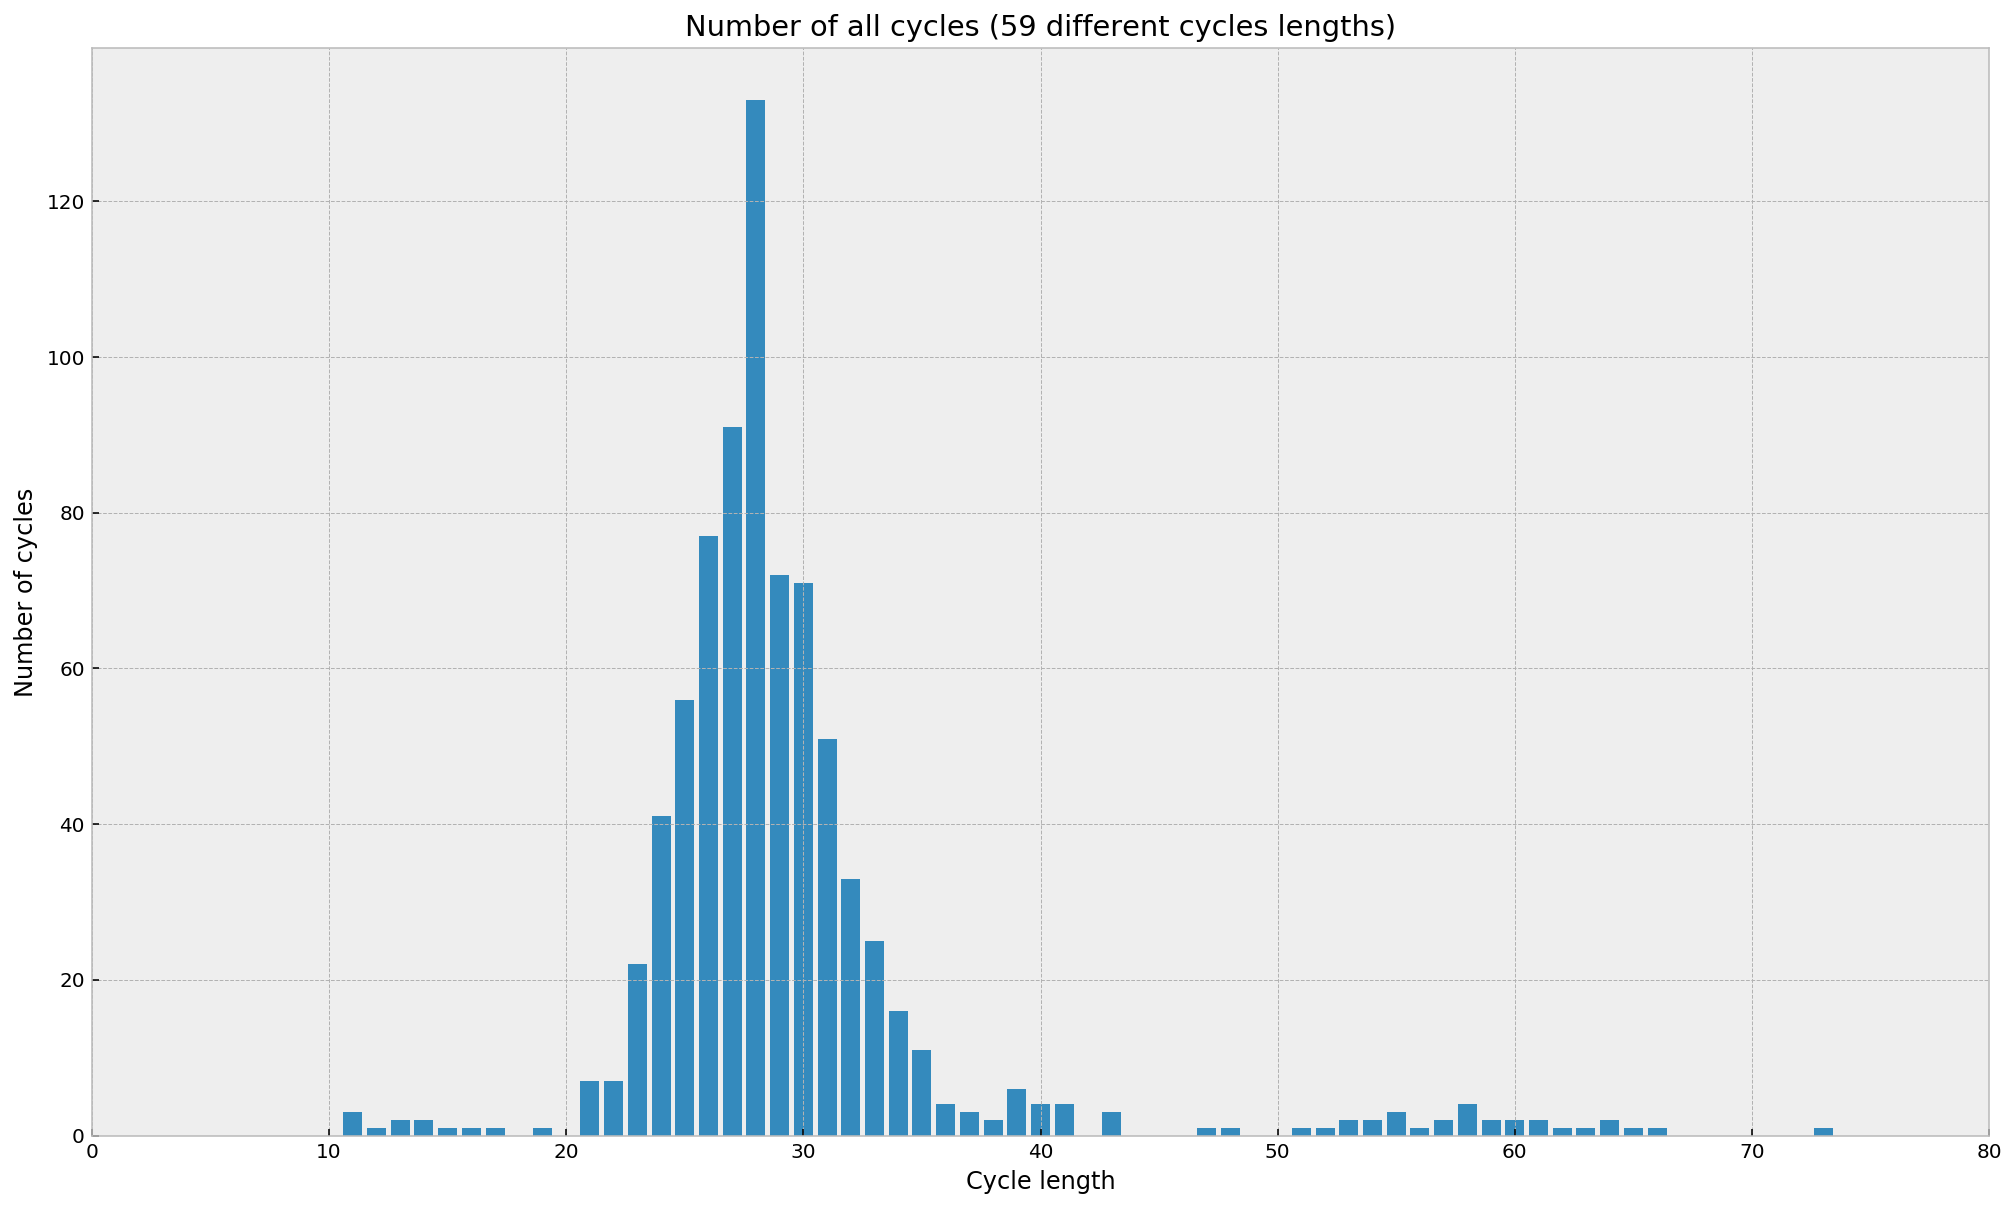

In [54]:
print("unique cycle lengths: ", sorted(df["cycle_length"].unique()))
print("number of unique cycle lengths: ", len(df["cycle_length"].unique()))
print()
print("regular cycle lengths between 20 and 36 days")
print()
### barplot
values = []
keys = []

#length = sorted(df2["cycle_length"].unique())[0]
for l in sorted(df2["cycle_length"].unique()):
    #print("number of cycles with length {}: {}".format(length, len(df2[df2.cycle_length == length].cycle_index.unique())))
    values.append(len(df2[df2.cycle_length == l].cycle_index.unique()))
    
    keys.append(l)
    #length+=1
    ## barplot!!!

with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (17,10))
    plt.bar(keys, values)
    plt.ylabel("Number of cycles")
    plt.xlabel("Cycle length")
    plt.title("Number of all cycles (59 different cycles lengths)")
    plt.xlim(0, 80)
fig.savefig("Plots_DataExploration/cycleLengths.png", dpi = 600)

print(values)
print()
print(keys)

### Dataframe with cycles of regular length only

In [55]:
df_regLen = df2.loc[(df2.cycle_length >= 20)&(df2.cycle_length <= 36)]
print("unique cycle lengths in regular df: ", sorted(df_regLen["cycle_length"].unique()))
print("number of cycles in regular df: ", len(df_regLen.groupby(["user","cycle_number"]).describe()))


unique cycle lengths in regular df:  [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
number of cycles in regular df:  717


### Dataframe with cycles of regular length only and without missing days

(if cycle_length value > count of cycle_days in one cycle)

In [56]:
groupby_cycles = df_regLen.groupby(["user","cycle_number"]).describe()
groupby_cycles.head()

br                                                        \
                  count       mean       std        min        25%        50%   
user cycle_number                                                               
359  1             20.0  15.611173  0.208234  15.184817  15.470119  15.577857   
     2             19.0  15.572066  0.127777  15.398499  15.497297  15.551957   
     3             17.0  15.013356  0.247923  14.646345  14.822556  14.971979   
360  1             34.0  13.616334  0.265956  13.081668  13.527220  13.623211   
     2             32.0  13.444502  0.207830  13.064451  13.293356  13.438019   

                                        br_norm               ...    st_norm  \
                         75%        max   count          mean ...        75%   
user cycle_number                                             ...              
359  1             15.770270  16.081958    20.0 -9.392487e-15 ...   0.690983   
     2             15.633688  15.834701    19.0 -2.205838e-15 ...   0.829764   
     3             15.118210  15.581026    17.0  8.685862e-16 ...   1.021604   
360  1             13.766788  14.211006    34.0  6.635215e-15 ...   0.797645   
     2             13.568540  13.861904    32.0 -2.685352e-15 ...   0.893072   

                            st_stan                                     \
                        max   count      mean       std  min       25%   
user cycle_number                                                        
359  1             1.726723    20.0  0.574337  0.246515  0.0  0.429634   
     2             1.726493    19.0  0.416824  0.337781  0.0  0.125844   
     3             1.331695    17.0  0.554510  0.334528  0.0  0.253218   
360  1             1.416384    34.0  0.708781  0.205607  0.0  0.600996   
     2             1.388743    32.0  0.553368  0.321609  0.0  0.291617   

                                            
                        50%       75%  max  
user cycle_number                           
359  1             0.576267  0.744675  1.0  
     2             0.350508  0.697102  1.0  
     3             0.642101  0.896266  1.0  
360  1             0.680077  0.872783  1.0  
     2             0.553898  0.840588  1.0  

[5 rows x 104 columns]

In [57]:
groupby_cycles = pd.DataFrame(groupby_cycles[["cycle_day", "cycle_length"]]).reset_index()

In [58]:
print("number of incomplete cycles (with missing days): ", len(groupby_cycles[groupby_cycles.cycle_day["count"] != groupby_cycles.cycle_length["mean"]]))

number of incomplete cycles (with missing days):  545


In [59]:
print("number of complete cycles (without missing days): ",len(groupby_cycles[groupby_cycles.cycle_day["count"] == groupby_cycles.cycle_length["mean"]]))
print()
print("users with complete cycles: ",len(groupby_cycles[groupby_cycles.cycle_day["count"] == groupby_cycles.cycle_length["mean"]]["user"].unique()))
                                         

number of complete cycles (without missing days):  172

users with complete cycles:  77


#### incomplete cycles

In [60]:
index_incompleteCycles = groupby_cycles[groupby_cycles.cycle_day["count"] != groupby_cycles.cycle_length["mean"]].index
missingdays_df = groupby_cycles.iloc[index_incompleteCycles][["user", "cycle_number"]]
# time series data frame with complete cycles and regular length
missingdays = pd.DataFrame()
for user in np.unique(missingdays_df.user.values):
    for cycle in missingdays_df[missingdays_df.user == user].cycle_number.values:
        #print("user: ", user)
        #print("cycle: ", cycle)
        missingdays = missingdays.append(df_regLen[(df_regLen["user"] == user)&(df_regLen["cycle_number"] == cycle)])
        #print(gold[["user", "cycle_number", "date"]])

In [61]:
missingdays.to_csv("Data/missingdays_reglen.csv")

#### complete cycles

In [62]:
index_completeCycles = groupby_cycles[groupby_cycles.cycle_day["count"] == groupby_cycles.cycle_length["mean"]].index
gold_df = groupby_cycles.iloc[index_completeCycles][["user", "cycle_number"]]

In [63]:
# time series data frame with complete cycles and regular length
gold = pd.DataFrame()
for user in np.unique(gold_df.user.values):
    for cycle in gold_df[gold_df.user == user].cycle_number.values:
        #print("user: ", user)
        #print("cycle: ", cycle)
        gold = gold.append(df_regLen[(df_regLen["user"] == user)&(df_regLen["cycle_number"] == cycle)])
        #print(gold[["user", "cycle_number", "date"]])

In [64]:
print("Missing values per column:")
print(gold.apply(num_missing, axis=0))

Missing values per column:
index               0
user                0
first_date          0
last_date           0
cycle_number        0
cycle_length        0
date                0
cycle_day           0
skin_temperature    0
hr                  0
br                  0
cycle_index         0
br_norm             0
hr_norm             0
st_norm             0
br_stan             0
hr_stan             0
st_stan             0
dtype: int64


In [65]:
gold.to_csv("Data/data_clean.csv")

## wrong ->

In [66]:
gold2 = gold.reset_index()
print("Missing values per column:")
print(gold2.apply(num_missing, axis=0))
print()
print(len(gold2))

gold2.to_csv("Data/data_clean2.csv")

Missing values per column:
level_0             0
index               0
user                0
first_date          0
last_date           0
cycle_number        0
cycle_length        0
date                0
cycle_day           0
skin_temperature    0
hr                  0
br                  0
cycle_index         0
br_norm             0
hr_norm             0
st_norm             0
br_stan             0
hr_stan             0
st_stan             0
dtype: int64

4811


st_ = gold2[["cycle_day", "skin_temperature", "cycle_index"]]
hr_ = gold2[["cycle_day", "hr", "cycle_index"]]
br_ = gold2[["cycle_day", "br", "cycle_index"]]
st = st_.pivot_table(index = "cycle_day", columns="cycle_index", values = "skin_temperature").fillna(0)
hr = hr_.pivot_table(index = "cycle_day", columns="cycle_index", values = "hr").fillna(0)
br = br_.pivot_table(index = "cycle_day", columns="cycle_index", values = "br").fillna(0)

st.to_csv("Data/st.csv")
br.to_csv("Data/br.csv")
hr.to_csv("Data/hr.csv")



st_na = st_.pivot_table(index = "cycle_day", columns="cycle_index", values = "skin_temperature")
hr_na = hr_.pivot_table(index = "cycle_day", columns="cycle_index", values = "hr")
br_na = br_.pivot_table(index = "cycle_day", columns="cycle_index", values = "br")

st_na.to_csv("Data/st_na.csv")
br_na.to_csv("Data/br_na.csv")
hr_na.to_csv("Data/hr_na.csv")

In [67]:
print(len(gold2.cycle_index.unique()))
print(len(missingdays.cycle_index.unique()))
print(len(gold2.cycle_index.unique())+len(missingdays.cycle_index.unique()))

172
545
717


### Find all cycles with same length and choose randomly five to plot


[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]
[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


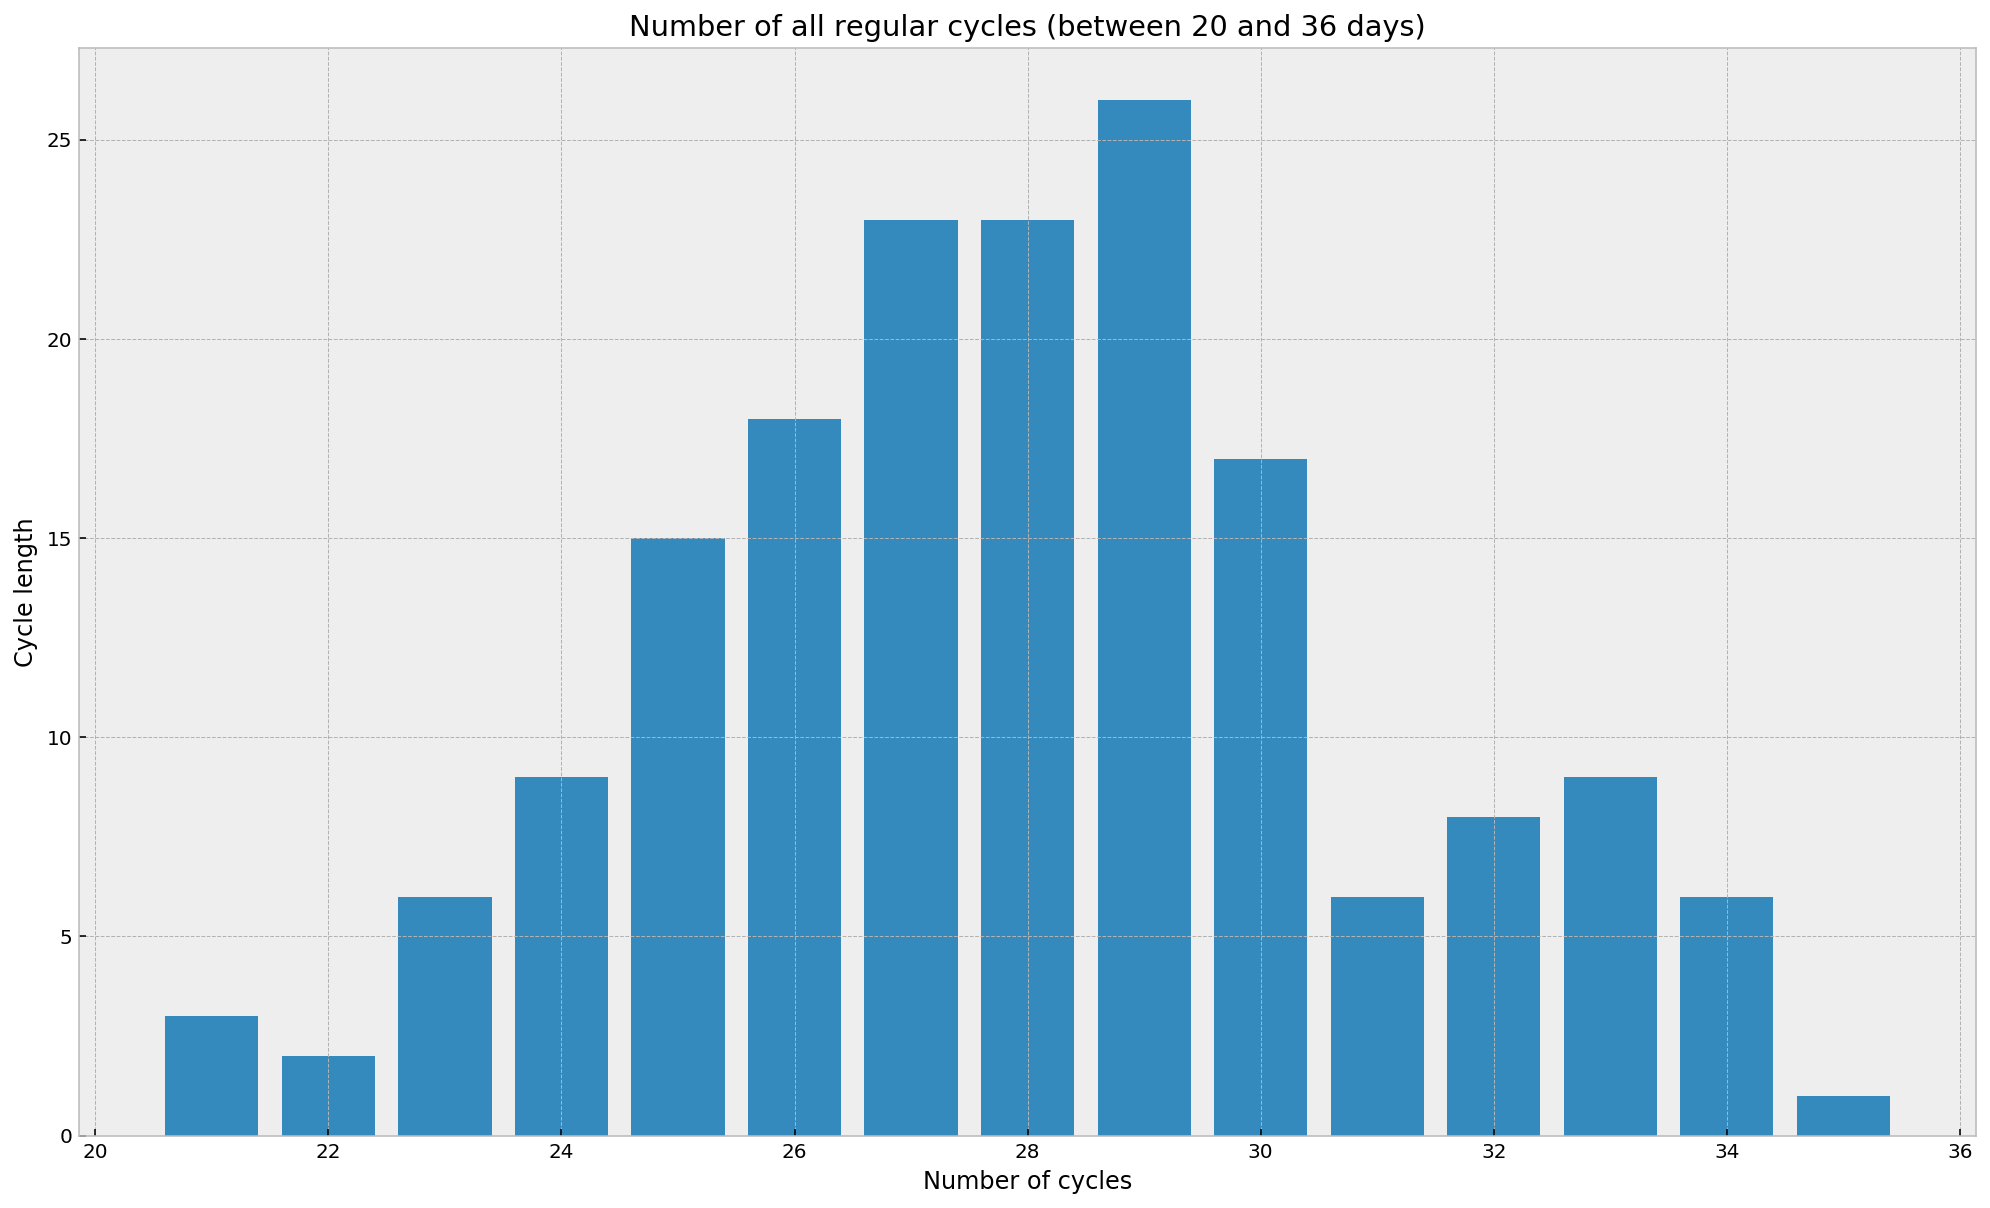

In [68]:
keys = []
values = []
length = sorted(gold2["cycle_length"].unique())
print(length)
print(sorted(gold2["cycle_length"].unique()))
for l in sorted(gold2["cycle_length"].unique()):
    #print("number of cycles with length {}: {}".format(l, len(gold2[gold2.cycle_length == l].cycle_index.unique())))
    #print("length: ", l)
    #print("l: ", l)

    
    ## barplot!
    values.append(len(gold2[gold2.cycle_length == l].cycle_index.unique()))
    keys.append(l)
with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (17,10))
    plt.bar(keys, values)
    
    plt.xlabel("Number of cycles")
    plt.ylabel("Cycle length")
    plt.title("Number of all regular cycles (between 20 and 36 days)")
fig.savefig("Plots_DataExploration/cycleLengthsRegular.png")

#print(keys)
#print(values)


In [69]:
lShort = 24
lReg = 28
lLong = 33

short = gold2[gold2.cycle_length == lShort]
reg = gold2[gold2.cycle_length == lReg]
long = gold2[gold2.cycle_length == lLong]
print("number of short cycles: ", len(short.cycle_index.unique()))
print("number of regular cycles: ", len(reg.cycle_index.unique()))
print("number of long cycles: ", len(long.cycle_index.unique()))

number of short cycles:  9
number of regular cycles:  23
number of long cycles:  9


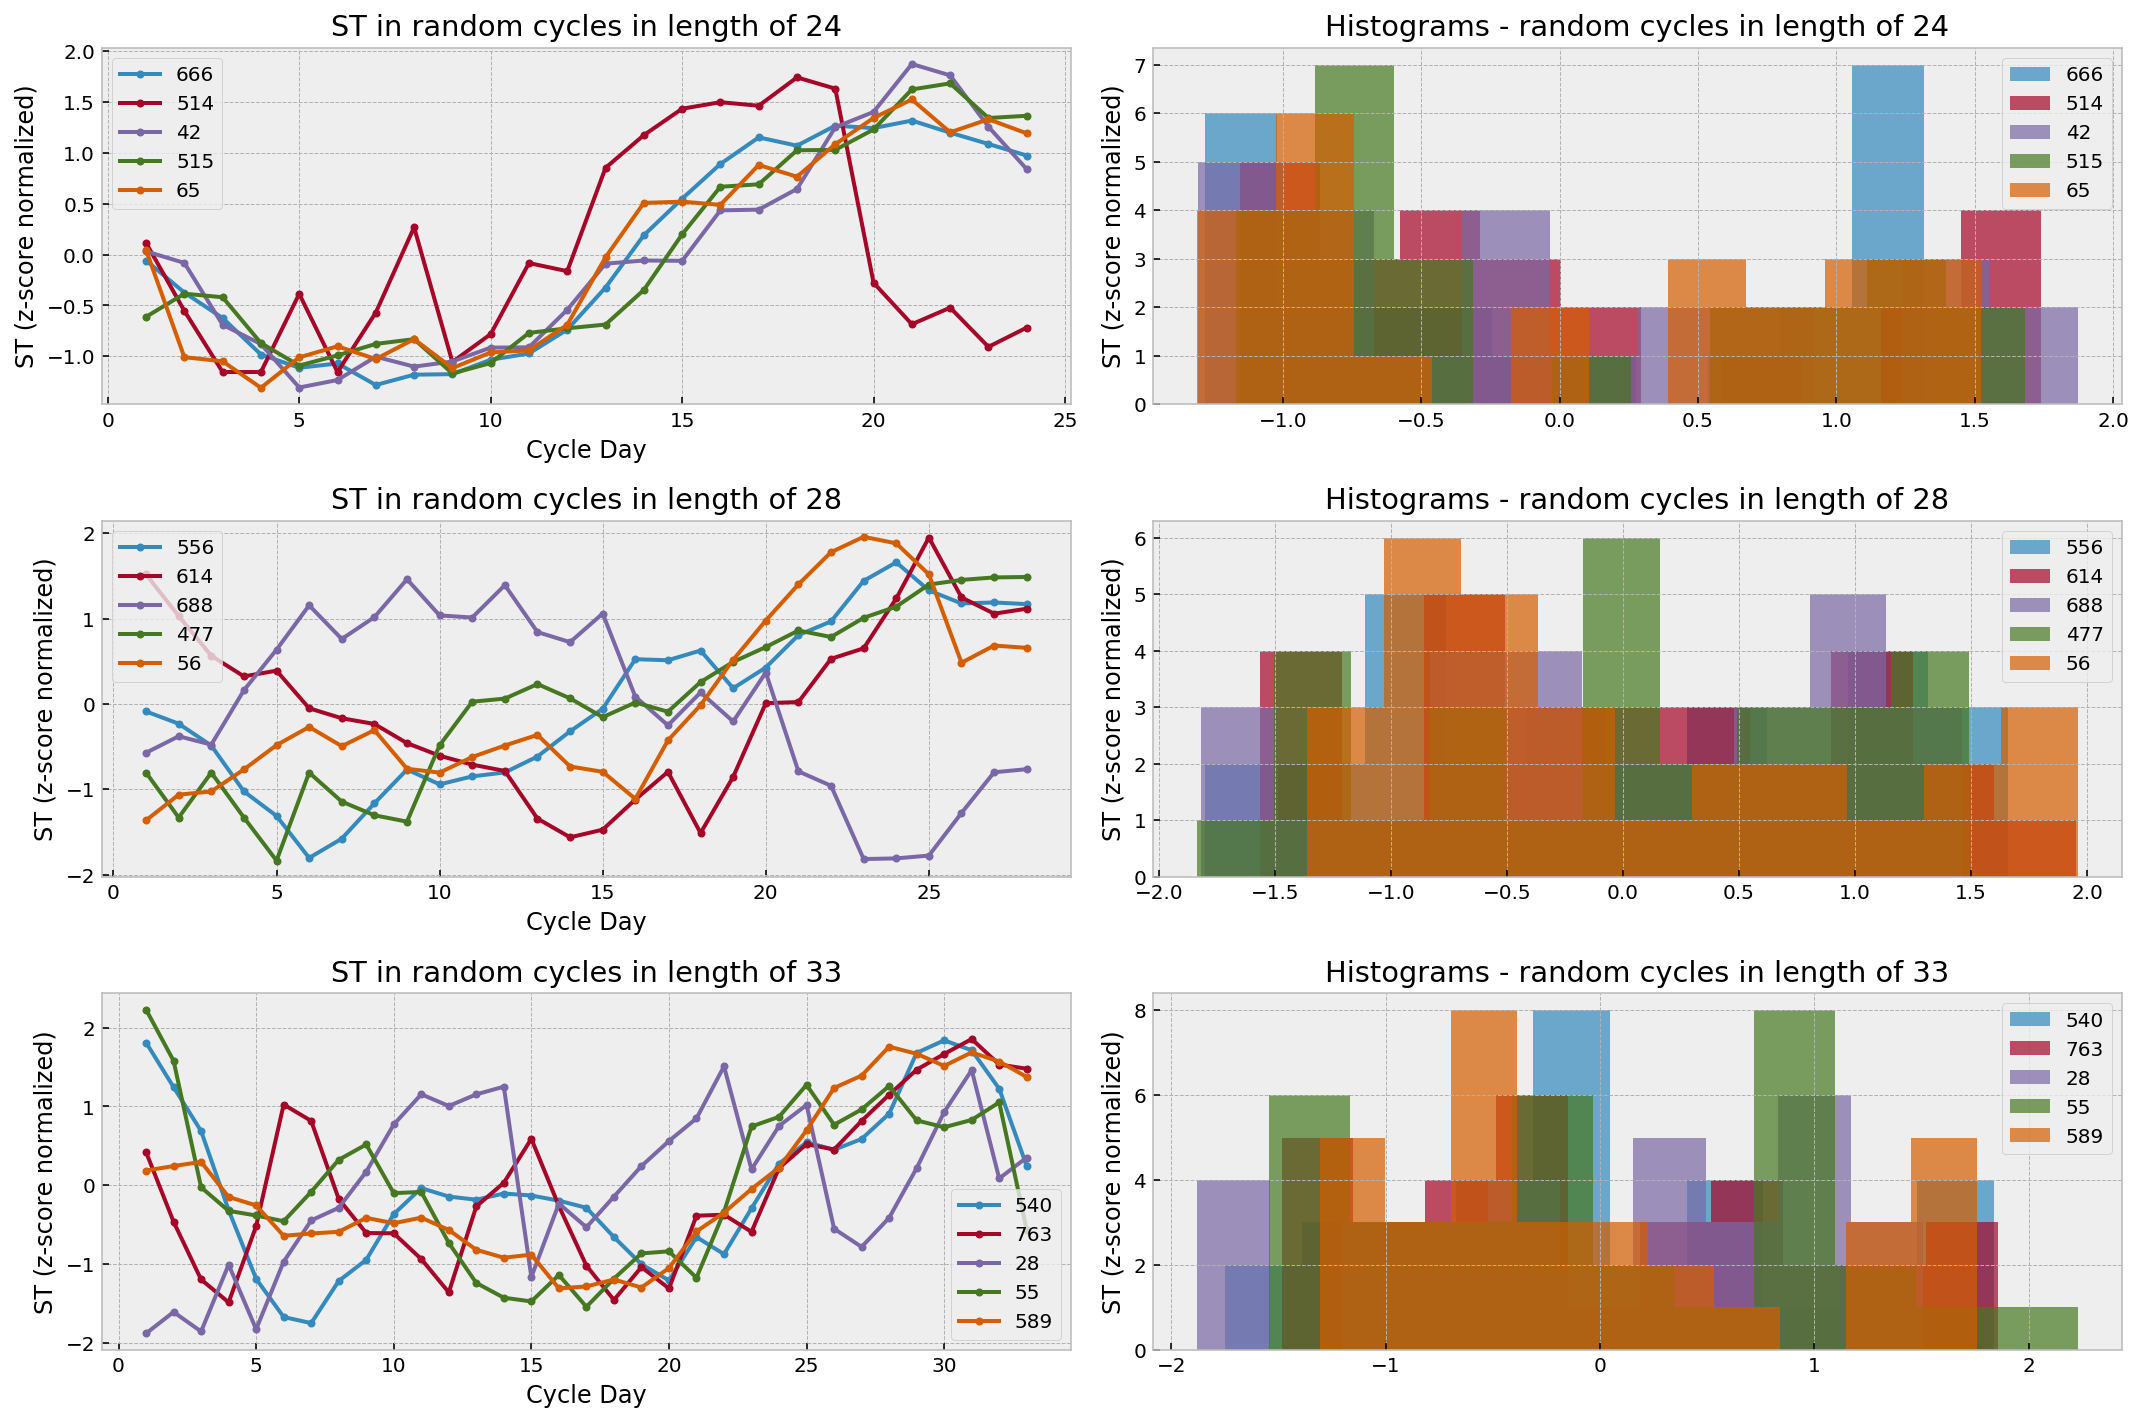

In [70]:
import random
lengths = [lShort, lReg, lLong]
i = 1
j = 2

feature = "st_norm"

bins = 10
alpha = 0.7


with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (15,10))

    for l in lengths:
        #print(l)
        #print(i)
        random_cycle = gold2[gold2.cycle_length == l]
        #print(random_cycle.cycle_index.unique())
        random_index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
        #print(random_cycle.cycle_index.unique()[random_index])
        cycle_indexes = random_cycle.cycle_index.unique()[random_index]

        ax = fig.add_subplot(3,2,i)
        i+=2
        for cycle_index in cycle_indexes:
            #print(random_cycle[random_cycle.cycle_index == cycle_index])
            #print()
            ax.plot(random_cycle[random_cycle.cycle_index == cycle_index]["cycle_day"], random_cycle[random_cycle.cycle_index == cycle_index][feature],linestyle='-', marker = ".", label = cycle_index)
            plt.legend()
            plt.title('{} in random cycles in length of {}'.format(feature[:2].upper(), l))
        plt.xlabel('Cycle Day')
        plt.ylabel('{} (z-score normalized)'.format(feature[:2].upper()))
        
        
        
        ax = fig.add_subplot(3,2,j)
        j+=2

        plt.title('Histograms - random cycles in length of {}'.format(l))
        x0 = random_cycle[random_cycle.cycle_index == cycle_indexes[0]][feature].values
        x0 = x0[~np.isnan(x0)]
        x1 = random_cycle[random_cycle.cycle_index == cycle_indexes[1]][feature].values
        x1 = x1[~np.isnan(x1)]
        x2 = random_cycle[random_cycle.cycle_index == cycle_indexes[2]][feature].values
        x2 = x2[~np.isnan(x2)]
        x3 = random_cycle[random_cycle.cycle_index == cycle_indexes[3]][feature].values
        x3 = x3[~np.isnan(x3)]
        x4 = random_cycle[random_cycle.cycle_index == cycle_indexes[4]][feature].values
        x4 = x4[~np.isnan(x4)]
        
        plt.hist(x0, label = str(cycle_indexes[0]), bins = bins, alpha = alpha)
        plt.hist(x1, label = str(cycle_indexes[1]), bins = bins, alpha = alpha)
        plt.hist(x2,  label = str(cycle_indexes[2]), bins = bins, alpha = alpha)
        plt.hist(x3,  label = str(cycle_indexes[3]), bins = bins, alpha = alpha)
        plt.hist(x4,  label = str(cycle_indexes[4]), bins = bins, alpha = alpha)
        plt.legend()


        plt.xlabel('')
        plt.ylabel("{} (z-score normalized)".format(feature[:2].upper()))

        
        
        plt.tight_layout()

    fig.savefig("Plots_DataCleaning/st_norm_diffLen_6.png", dpi = 600)

In [71]:
#fig.savefig("Plots_DataCleaning/br_norm_diffLen_rand4.png", dpi = 600)

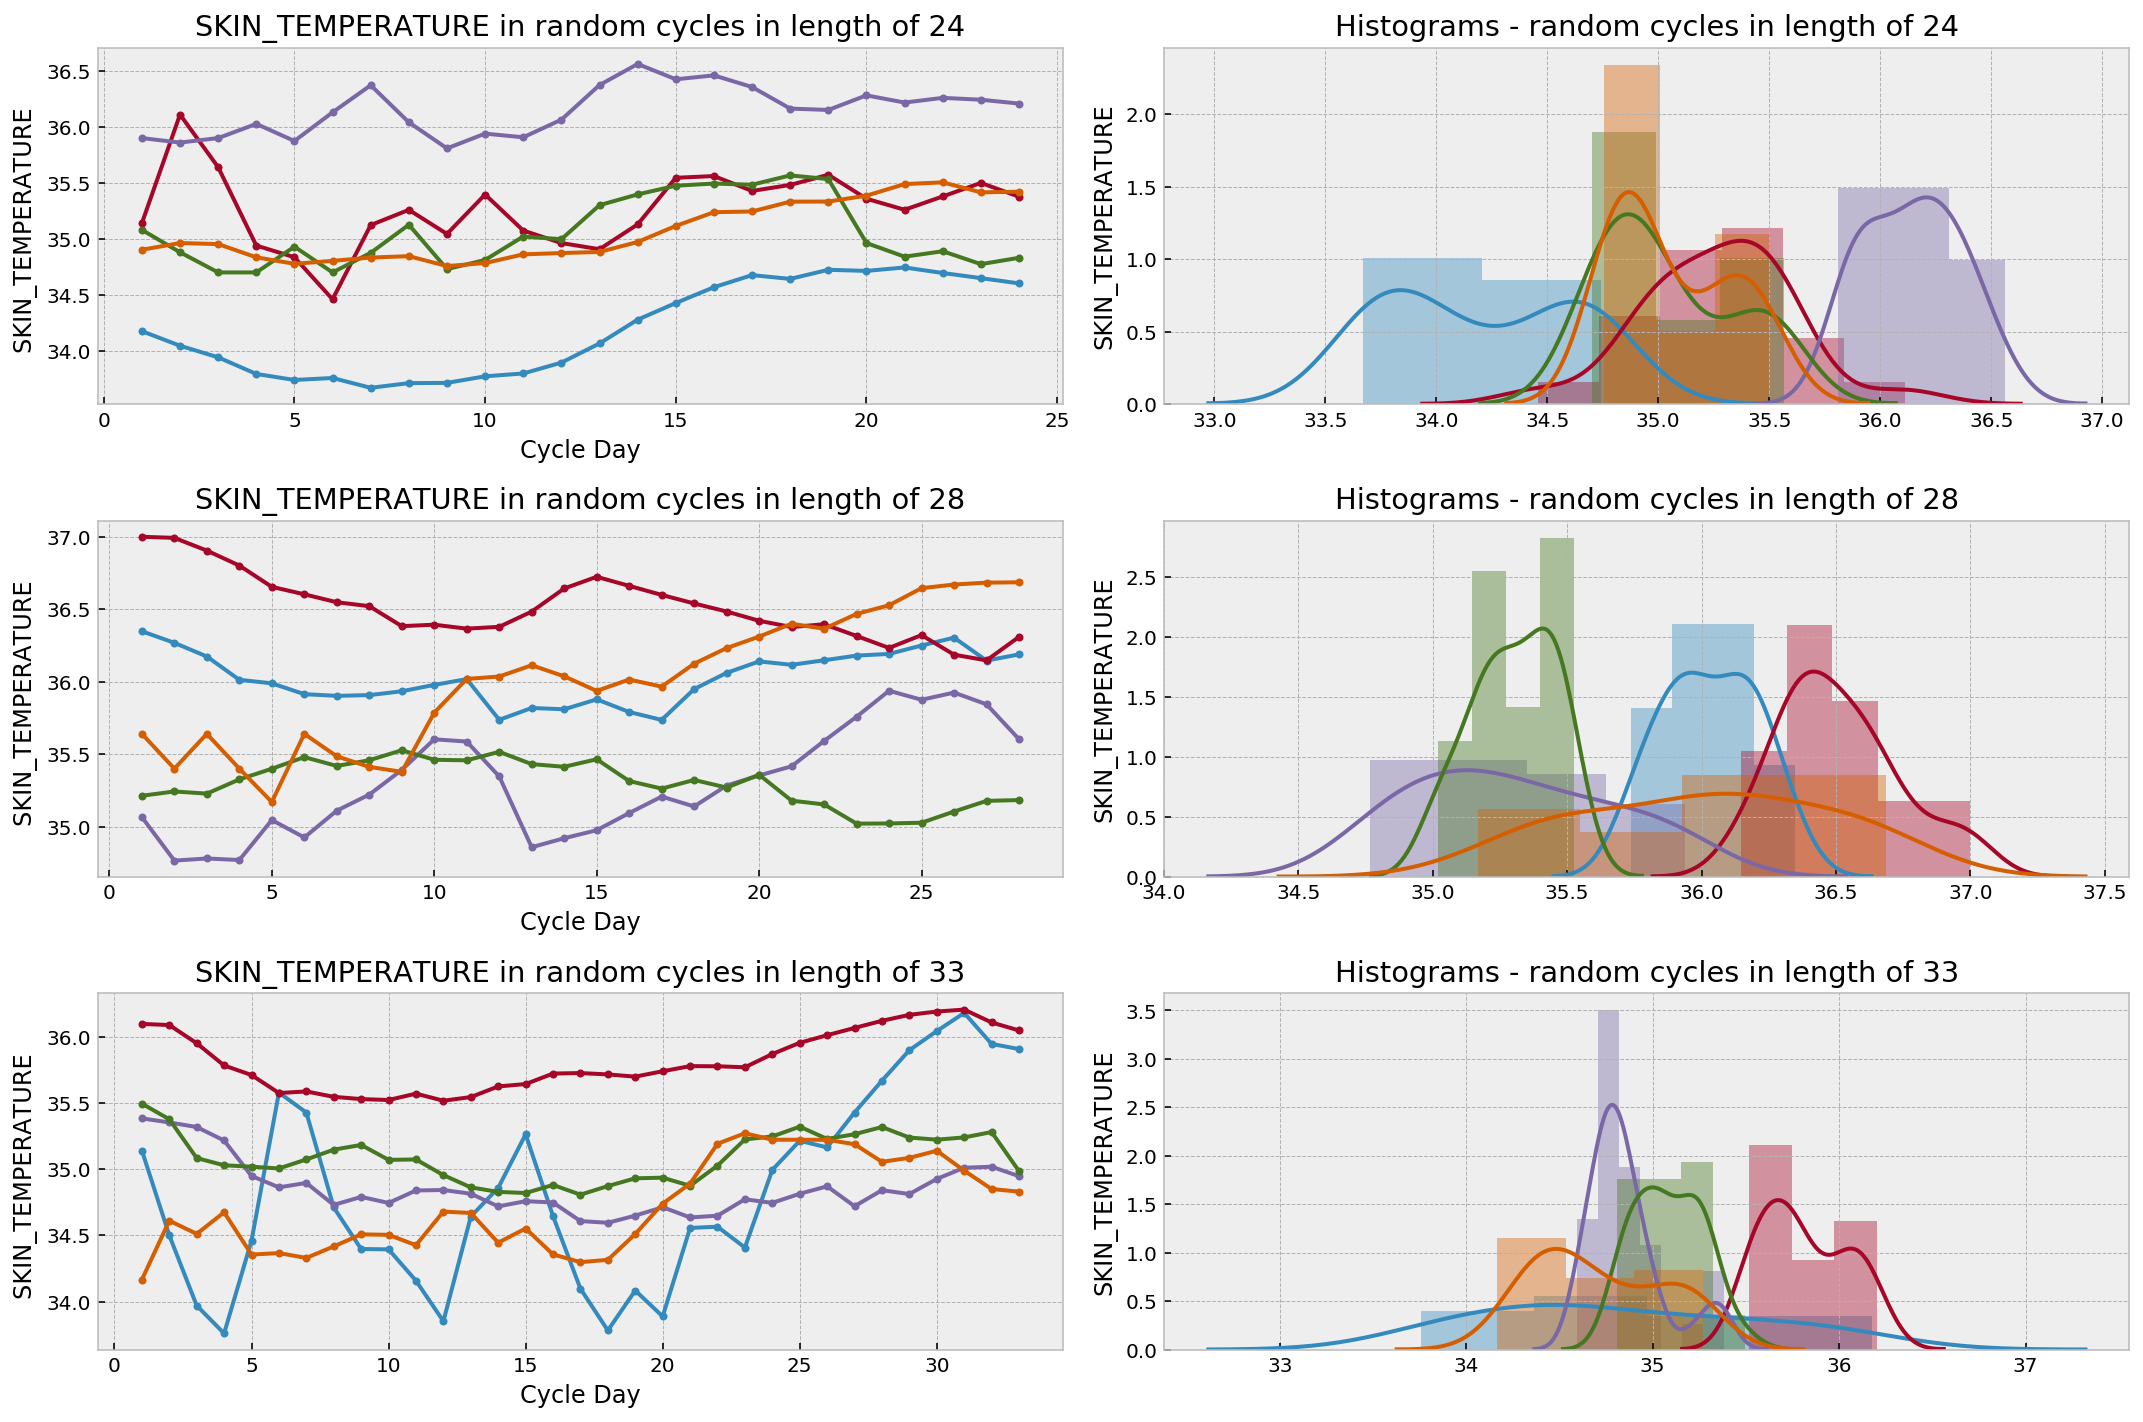

In [79]:
import random
lengths = [lShort, lReg, lLong]
#subplot iteration time series
i = 1
#subplot iteration distribution
j = 2

feature = "skin_temperature"

bins = 10
alpha = 0.5


with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (15,10))

    for l in lengths:
        #print(l)
        #print(i)
        random_cycle = gold2[gold2.cycle_length == l]
        #print(random_cycle.cycle_index.unique())
        random_index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
        #print(random_cycle.cycle_index.unique()[random_index])
        cycle_indexes = random_cycle.cycle_index.unique()[random_index]

        ax = fig.add_subplot(3,2,i)
        i+=2
        for cycle_index in cycle_indexes:
            ax.plot(random_cycle[random_cycle.cycle_index == cycle_index]["cycle_day"], random_cycle[random_cycle.cycle_index == cycle_index][feature],linestyle='-', marker = ".", label = cycle_index)
            #plt.legend()
            plt.title('{} in random cycles in length of {}'.format(feature.upper(), l))
        plt.xlabel('Cycle Day')
        plt.ylabel('{} '.format(feature.upper()))
        
        
        
        ax = fig.add_subplot(3,2,j)
        j+=2

        plt.title('Histograms - random cycles in length of {}'.format(l))
        x0 = random_cycle[random_cycle.cycle_index == cycle_indexes[0]][feature].values
        x0 = x0[~np.isnan(x0)]
        x1 = random_cycle[random_cycle.cycle_index == cycle_indexes[1]][feature].values
        x1 = x1[~np.isnan(x1)]
        x2 = random_cycle[random_cycle.cycle_index == cycle_indexes[2]][feature].values
        x2 = x2[~np.isnan(x2)]
        x3 = random_cycle[random_cycle.cycle_index == cycle_indexes[3]][feature].values
        x3 = x3[~np.isnan(x3)]
        x4 = random_cycle[random_cycle.cycle_index == cycle_indexes[4]][feature].values
        x4 = x4[~np.isnan(x4)]
        
        sns.distplot(x0, label = str(cycle_indexes[0])).set_autoscale_on(True)
        sns.distplot(x1, label = str(cycle_indexes[1])).set_autoscale_on(True)
        sns.distplot(x2,  label = str(cycle_indexes[2])).set_autoscale_on(True)
        sns.distplot(x3,  label = str(cycle_indexes[3])).set_autoscale_on(True)
        sns.distplot(x4,  label = str(cycle_indexes[4])).set_autoscale_on(True)
        #plt.legend()


        plt.xlabel('')
        plt.ylabel("{}".format(feature.upper()))
        

        
        plt.tight_layout()

    fig.savefig("Plots_DataCleaning/Comparing_Scaling/st_raw_diffLen_3.png", dpi = 600)

### influence of different scaling

/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:191: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: float division by zero

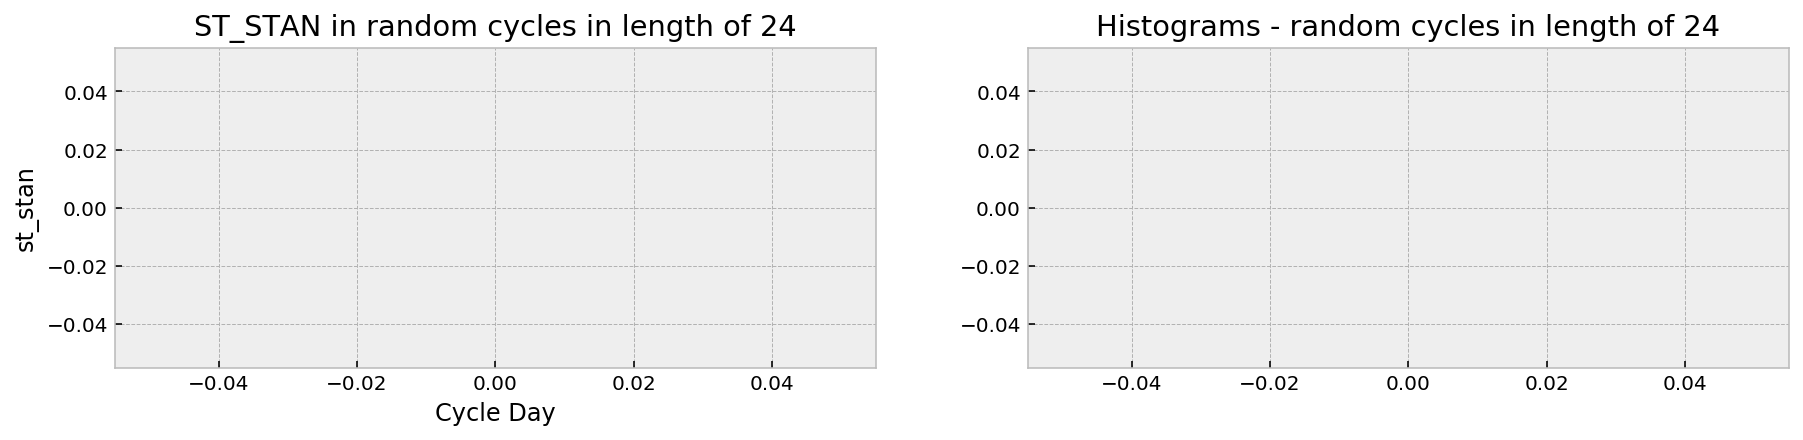

In [73]:
import random
lengths = [lShort, lReg, lLong]
i = 1
j = 2

bins = 10
alpha = 0.5

cycle_indexes = {lShort:[21,115,78,131,12],
                lReg:[138,162,118,80,14],
                lLong:[89,145,110,102,157]}

feature = "st_stan"

with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (15,10))

    for l in lengths:
        #print(l)
        #print(i)
        random_cycle = gold2[gold2.cycle_length == l]
        #print(random_cycle.cycle_index.unique())
        #random_index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
        #print(random_cycle.cycle_index.unique()[random_index])

        ax = fig.add_subplot(3,2,i)
        i+=2
        for cycle_index in cycle_indexes[l]:
            #print("cycle_index", cycle_index)
            #print(random_cycle[random_cycle.cycle_index == cycle_index][feature].values)
            #print()
            ax.plot(random_cycle[random_cycle.cycle_index == cycle_index]["cycle_day"], random_cycle[random_cycle.cycle_index == cycle_index][feature],linestyle='-', marker = ".", label = cycle_index)
            #plt.legend()
            plt.title('{} in random cycles in length of {}'.format(feature.upper(), l))
        plt.xlabel('Cycle Day')
        plt.ylabel("{}".format(feature))
        #plt.ylabel('{} (z-score normalized)'.format(feature[:2].upper()))
        
        
        
        ax = fig.add_subplot(3,2,j)
        j+=2

        plt.title('Histograms - random cycles in length of {}'.format(l))
        x0 = random_cycle[random_cycle.cycle_index == cycle_indexes[l][0]][feature].values
        x0 = x0[~np.isnan(x0)]
        x1 = random_cycle[random_cycle.cycle_index == cycle_indexes[l][1]][feature].values
        x1 = x1[~np.isnan(x1)]
        x2 = random_cycle[random_cycle.cycle_index == cycle_indexes[l][2]][feature].values
        x2 = x2[~np.isnan(x2)]
        x3 = random_cycle[random_cycle.cycle_index == cycle_indexes[l][3]][feature].values
        x3 = x3[~np.isnan(x3)]
        x4 = random_cycle[random_cycle.cycle_index == cycle_indexes[l][4]][feature].values
        x4 = x4[~np.isnan(x4)]
        
        sns.distplot(x0, label = str(cycle_indexes[l][0])).set_autoscale_on(True)
        sns.distplot(x1, label = str(cycle_indexes[l][1])).set_autoscale_on(True)
        sns.distplot(x2,  label = str(cycle_indexes[l][2])).set_autoscale_on(True)
        sns.distplot(x3,  label = str(cycle_indexes[l][3])).set_autoscale_on(True)
        sns.distplot(x4,  label = str(cycle_indexes[l][4])).set_autoscale_on(True)
        plt.legend()


        plt.xlabel('')
        #plt.ylabel("{} (z-score normalized)".format(feature[:2].upper()))
        plt.ylabel("{}".format(feature))

        
        plt.tight_layout()

    #fig.savefig("Plots_DataCleaning/Comparing_Scaling/st_stan_diffLen.png", dpi = 600)

### logarithmic y scale (separated timeseries)

In [ ]:
import random
lengths = [lShort, lReg, lLong]
i = 1
log_ = 1
feature = "st_norm"

bins = 10
alpha = 0.5


with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (15,15))

    for l in lengths:
        #print(l)
        #print(i)
        random_cycle = gold2[gold2.cycle_length == l]
        #print(random_cycle.cycle_index.unique())
        random_index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
        #print(random_cycle.cycle_index.unique()[random_index])
        cycle_indexes = random_cycle.cycle_index.unique()[random_index]

        ax = fig.add_subplot(3,1,i)
        i+=1
        for cycle_index in cycle_indexes:
            feature_values = random_cycle[random_cycle.cycle_index == cycle_index][feature].values
            #print("feature values")
            #print(feature_values)
            f_min = feature_values.min()
            #print("f_min", f_min)
            feature_values = (feature_values - f_min + 1)*log_
            #print("feature values after log", feature_values)
            plt.semilogy(range(len(random_cycle[random_cycle.cycle_index == cycle_index]["cycle_day"])),feature_values,linestyle='-' ,marker = ".", label = cycle_index)
            plt.yscale("log")
            plt.legend()
            plt.title('{} in random cycles in length of {}'.format(feature[:2].upper(), l))
            log_*=10
        plt.xlabel('Cycle Day')
        plt.ylabel('{} * 10^n, z-score normalized'.format(feature[:2].upper()))
        
plt.tight_layout()

### Create Dataframe with feature cycles of certain length only

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
length = 29
cycles = gold2[gold2.cycle_length == length]
indexes = cycles.cycle_index.unique()
X = []
for index in indexes:
    X.append(cycles[cycles.cycle_index == index]["hr_norm"].values.tolist())
    #print(random_cycle.cycle_index.unique())
    #index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
    #print(random_cycle.cycle_index.unique()[random_index])
    #cycle_indexes = random_cycle.cycle_index.unique()[random_index]


cycles.to_csv("Data/X29.csv")

# distance between rows of X
#euclidean_distances(X, X)

### 29 Days (most complete cycles)

In [ ]:
value_st = "st_norm"
value_hr = "hr_norm"
value_br = "br_norm"

st_ = cycles[["cycle_day", value_st, "cycle_index"]]
hr_ = cycles[["cycle_day", value_hr, "cycle_index"]]
br_ = cycles[["cycle_day", value_br, "cycle_index"]]

st_29 = st_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_st)
hr_29 = hr_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_hr)
br_29 = br_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_br)

st_29.to_csv("Data/st_29_norm.csv")
br_29.to_csv("Data/br_29_norm.csv")
hr_29.to_csv("Data/hr_29_norm.csv")

### all complete cycles

In [ ]:
value_st = "st_norm"
value_hr = "hr_norm"
value_br = "br_norm"

st_ = gold2[["cycle_day", value_st, "cycle_index"]]
hr_ = gold2[["cycle_day", value_hr, "cycle_index"]]
br_ = gold2[["cycle_day", value_br, "cycle_index"]]

st_all = st_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_st).fillna(0)
hr_all = hr_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_hr).fillna(0)
br_all = br_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_br).fillna(0)

st_all.to_csv("Data/st_all_norm.csv")
br_all.to_csv("Data/br_all_norm.csv")
hr_all.to_csv("Data/hr_all_norm.csv")

In [ ]:
## all incomplete cycles

In [ ]:
value_st = "st_norm"
value_hr = "hr_norm"
value_br = "br_norm"

st_ = missingdays[["cycle_day", value_st, "cycle_index"]]
hr_ = missingdays[["cycle_day", value_hr, "cycle_index"]]
br_ = missingdays[["cycle_day", value_br, "cycle_index"]]

st_all = st_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_st).fillna(0)
hr_all = hr_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_hr).fillna(0)
br_all = br_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_br).fillna(0)

st_all.to_csv("Data/st_incom_norm.csv")
br_all.to_csv("Data/br_incom_norm.csv")
hr_all.to_csv("Data/hr_incom_norm.csv")

In [ ]:
gold2.head(10)

In [ ]:
groupby_cycles